##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

## Preparation

Let's start with installing MediaPipe.


In [1]:
!pip install -q mediapipe==0.10.0

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [3]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

'wget' is not recognized as an internal or external command,
operable program or batch file.


## Visualization utilities

In [9]:
!pip install --user mediapipe


  Using cached mediapipe-0.10.8-cp39-cp39-win_amd64.whl (50.5 MB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
  Using cached opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl (44.8 MB)


In [24]:
!pip show mediapipe


Name: mediapipe
Version: 0.10.0
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: d:\anaconda\envs\tf_gpucheck\lib\site-packages
Requires: absl-py, attrs, flatbuffers, matplotlib, numpy, opencv-contrib-python, protobuf, sounddevice
Required-by: 


In [1]:
!pip install prompt_toolkit


In [ ]:

import mediapipe as mp

: 

In [5]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image

To demonstrate the Pose Landmarker API, you can download a sample image using the follow code. The image is from [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

In [2]:
!pip install google-colab

     -------------------------------------- 72.9/72.9 kB 803.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 64.2/64.2 kB ? eta 0:00:00
     -------------------------------------- 104.5/104.5 kB 6.3 MB/s eta 0:00:00
     -------------------------------------- 758.9/758.9 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 8.0/8.0 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 11.8/11.8 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 58.0/58.0 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 484.2/484.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [995 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\pandas
      copying pandas\conftest.py -> build\lib.win-amd64-cpython-39\pandas
      copying pandas\testing.py -> build\lib.win-amd64-cpython-39\pandas
      copying pandas\_version.py -> build\lib.win-amd64-cpython-39\pandas
      copying pandas\__init__.py -> build\lib.win-amd64-cpython-39\pandas
      creating build\lib.win-amd64-cpython-39\pandas\api
      copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-39\pandas\api
      creating build\lib.win-amd64-cpython-39\pandas\arrays
      copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-39\pandas\arrays
      creating build\lib.win-amd64-cpython-39\pandas\compat
      copying pandas\comp

In [ ]:
!pip install prompt_toolkit.formatted_text -U --force-reinstall

: 

In [ ]:
import numpy as np

: 

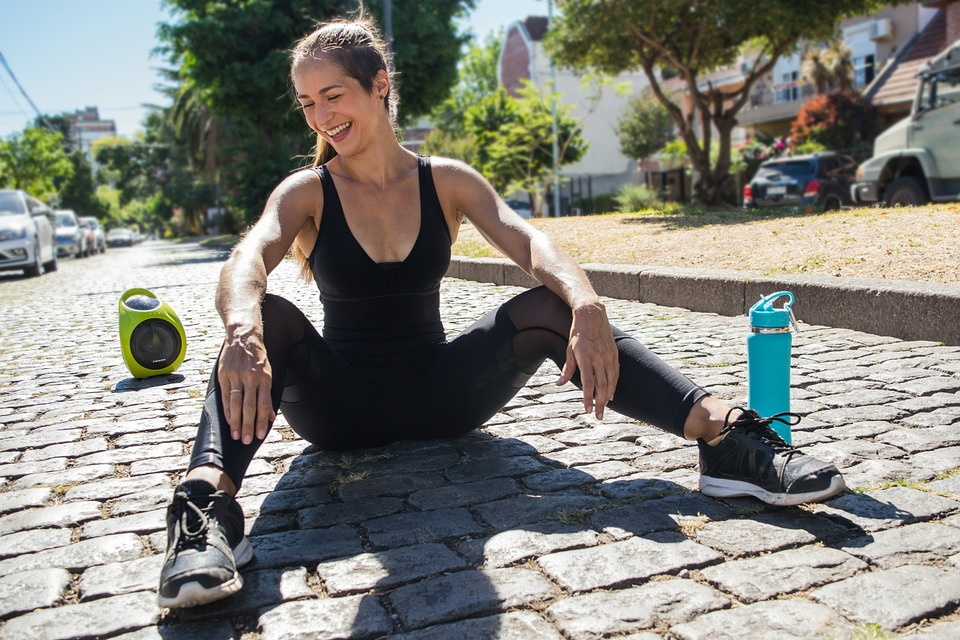

In [6]:

   

import cv2

from IPython.display import Image, display

# Assuming 'img' is your image array
# Convert the image array to an image file and display it

display(Image(filename='image.jpg'))

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


In [8]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker_lite.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

RuntimeError: Unable to open file at f:\opencv\pose_landmarker.task

Visualize the pose segmentation mask.

In [ ]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)